# ALL IMPORTS

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

 # Simulating Brownian motion using increments. 
 A process (𝐵𝑡, 𝑡 ≥ 0) defined on (Ω, ℱ, P) has the distribution of astandard Brownian motion on [0, ∞), as in Definition 2.25, if and only if the following hold:\
(1) 𝐵0 = 0.\
(2) For any 𝑠 < 𝑡, the increment 𝐵𝑡 − 𝐵𝑠
is Gaussian of mean 0 and variance 𝑡 − 𝑠.\
(3) For any 𝑛 ∈ ℕ and any choice of 𝑛 times 0 ≤ 𝑡1 < 𝑡2 < ⋯ < 𝑡𝑛 < ∞, the increments
𝐵𝑡2 − 𝐵𝑡1, 𝐵𝑡3 − 𝐵𝑡2, ..., 𝐵𝑡𝑛 − 𝐵𝑡𝑛−1 , are independent.\
(4) The path 𝑡 ↦ 𝐵𝑡(𝜔) is a continuous function for a set of 𝜔 of probability one.\
For a given 𝑇 > 0, a standard Brownian motion on [0, 𝑇] has the same definition as above
with the 𝑡’s restricted to [0, 𝑇].


In [34]:
def standard_brownian(t_1=0,t_2=1,step_size=0.01,number_of_paths=1,initial_value=0):
    n=int((t_2-t_1)/step_size)
    d=number_of_paths
    times = np.linspace(t_1,t_2,n)
    dt = times[1] - times[0]
    # Bt2 - Bt1 ~ Normal with mean 0 and variance t2-t1
    dB = np.sqrt(dt) * np.random.normal(size=(n - 1, d))
    B0 = initial_value*np.ones(shape=(1, d))
    B = np.concatenate((B0, initial_value +np.cumsum(dB, axis=0)), axis=0)
    return B 

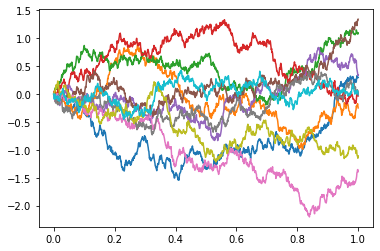

In [35]:
t_1,t_2,step_size,d=0.,1.,0.001,10
B=standard_brownian(t_1,t_2,step_size,d,0)
times=np.linspace(t_1,t_2,int((t_2-t_1)/step_size))
for i in range(d):
    plt.plot(times,B[:,i])

# Simulating the Poisson process :
A process (𝑁𝑡, 𝑡 ≥ 0) defined on (Ω, ℱ, P) has the distribution of a
Poisson process with rate 𝜆 > 0 if and only if the following hold:\
(1) 𝑁0 = 0.\
(2) For any 𝑠 < 𝑡, the increment 𝑁𝑡 − 𝑁𝑠
is a Poisson random variable with parameter
𝜆(𝑡 − 𝑠).\
(3) For any 𝑛 ∈ ℕ and any choice 0 ≤ 𝑡1 < 𝑡2 < ⋯ < 𝑡𝑛 < ∞, the increments
𝑁𝑡2 − 𝑁𝑡1
, 𝑁𝑡3 − 𝑁𝑡2
, ..., 𝑁𝑡𝑛 − 𝑁𝑡𝑛−1 are independent.


In [10]:
def poisson_process(lam=1.,t_1=0.,t_2=1.,step_size=0.01,number_of_paths=1,initial_value=0.):
    n=int((t_2-t_1)/step_size ) 
    d=number_of_paths
    times = np.linspace(t_1,t_2,n)
    dt = times[1] - times[0]
    # Pt2 - Pt1 ~ poisson with parameter lam *dt 
    dP = np.random.poisson(lam*dt,size=(n - 1, d))
    P0 = initial_value*np.ones(shape=(1, d))
    P  = np.concatenate((P0, initial_value+np.cumsum(dP, axis=0)), axis=0)
    return P

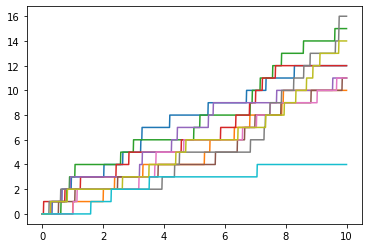

In [11]:
#Plotting poisson process
t_1,t_2,step_size,lam,d=0,10,0.01,1,10
P=poisson_process(lam,t_1,t_2,step_size,d,0)
times=np.linspace(t_1,t_2,int((t_2-t_1)/step_size))
for i in range(d):
    plt.plot(times,P[:,i])
    
    
    

# Brownian variations :

We will compute the variation and the quadratic variation of a brownian motion using the dyadic partition of [0,1] to prove the quadratic variation of the brownian motion at times t is t (in our case 1) and that the variation tends to infinity .


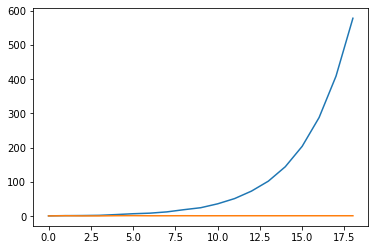

In [31]:
simple_variation=[]
quadratic_variation=[]
for n in range(1,20):
    times = np.linspace(0.,1.,(2**n))
    dt=times[1]-times[0]
    dB = np.sqrt(dt) * np.random.normal(size=(2**n -1 , 1))
    simple_variation.append(float(np.sum(np.abs(dB),axis=0)))
    quadratic_variation.append(float(np.sum(np.power(dB,2),axis=0)))
plt.plot(range(19),simple_variation)
plt.plot(range(19),quadratic_variation)
    